In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_data_complete['Mouse ID'])

1893

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data_complete.drop_duplicates(subset=['Mouse ID'], keep='first')
clean_mouse_data = clean_mouse_data.dropna(subset=['Mouse ID'])


clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.

len(clean_mouse_data['Mouse ID'])

249

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_data.mean()
median_tumor_volume = grouped_data.median()
variance_tumor_volume = grouped_data.var()
std_tumor_volume = grouped_data.std()
sem_tumor_volume = grouped_data.sem()


# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance of Tumor Volume': variance_tumor_volume,
    'Standard Deviation of Tumor Volume': std_tumor_volume,
    'SEM of Tumor Volume': sem_tumor_volume
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Variance_of_Tumor_Volume='var',
    Std_Deviation_of_Tumor_Volume='std',
    SEM_of_Tumor_Volume=lambda x: x.sem()
)
summary_statistics

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_of_Tumor_Volume,Std_Deviation_of_Tumor_Volume,SEM_of_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, '# of Observed Mouse Timepoints')

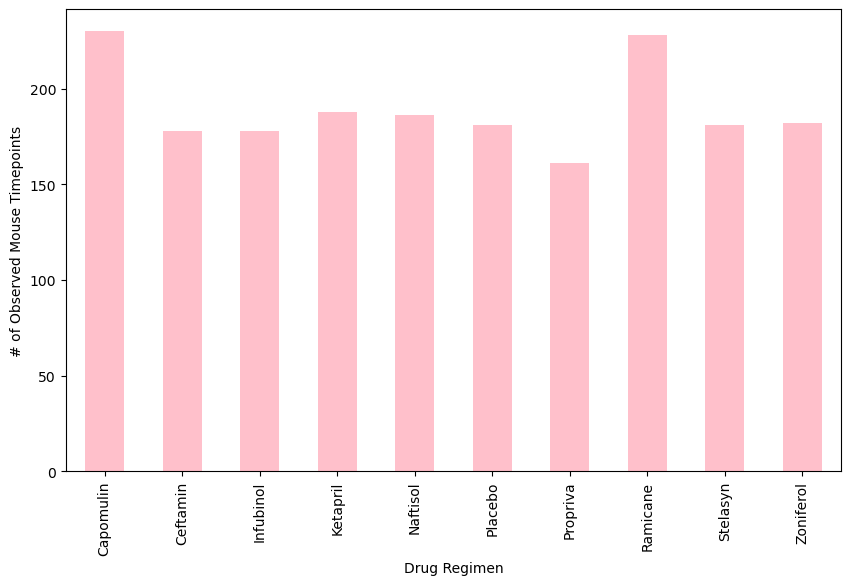

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_data_complete.groupby('Drug Regimen').size()

# Create a bar plot using Pandas
regimen_counts_plot = regimen_counts.plot(kind='bar', figsize=(10, 6), color='pink')

# Set x-axis and y-axis labels
regimen_counts_plot.set_xlabel('Drug Regimen')
regimen_counts_plot.set_ylabel('# of Observed Mouse Timepoints')

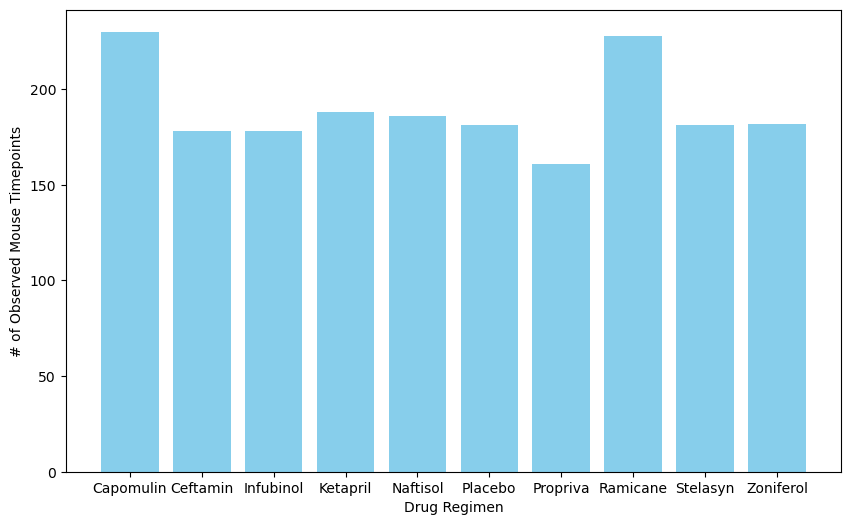

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = mouse_data_complete.groupby('Drug Regimen').size()
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

Text(0.5, 1.0, 'Distribution of Female vs. Male Mice')

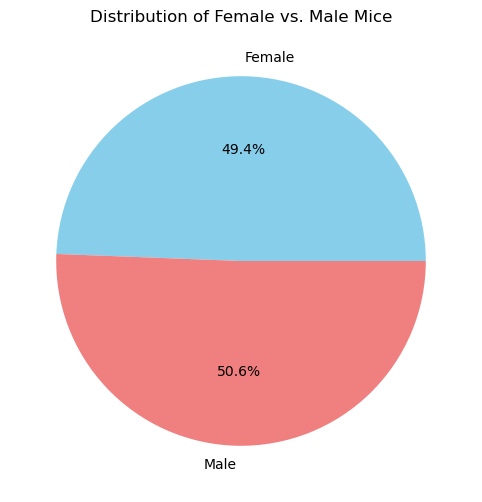

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
regimen_counts = mouse_data_complete.groupby('Sex').size()
regimen_counts_plot = regimen_counts.plot(kind='pie', figsize=(10, 6),colors=['skyblue', 'lightcoral'], autopct='%1.1f%%', labels=['Female', 'Male'])
regimen_counts_plot.set_title('Distribution of Female vs. Male Mice')

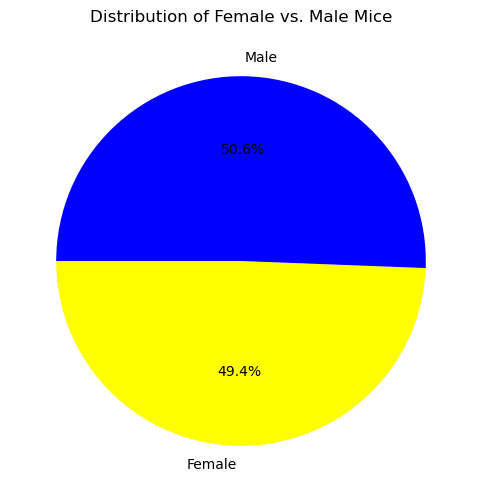

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = mouse_data_complete.groupby('Sex').size()

# Create a pie plot using pyplot
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], colors=['Yellow', 'blue'], autopct='%1.1f%%', startangle=180)

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_data_complete.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, mouse_data_complete, on=['Mouse ID', 'Timepoint'], how='inner')
# Filter for only the specified treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]
print("Final Tumor Volume for Each Mouse (Capomulin, Ramicane, Infubinol, Ceftamin):")
print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

Final Tumor Volume for Each Mouse (Capomulin, Ramicane, Infubinol, Ceftamin):
    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol         45           67.973419
1       a251    Infubinol         45           65.525743
3       a275     Ceftamin         45           62.999356
6       a411     Ramicane         45           38.407618
7       a444     Ramicane         45           43.047543
..       ...          ...        ...                 ...
239     y769     Ceftamin         45           68.594745
240     y793    Capomulin         45           31.896238
241     y865     Ceftamin         45           64.729837
245     z578     Ramicane         45           30.638696
246     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for this treatment regimen
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print information about potential outliers
    print(f"Potential outliers for {treatment}:")
    if len(outliers) == 0:
        print("None")
    else:
        print(outliers)
    print("-" * 40)



Potential outliers for Capomulin:
None
----------------------------------------
Potential outliers for Ramicane:
None
----------------------------------------
Potential outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
----------------------------------------
Potential outliers for Ceftamin:
None
----------------------------------------


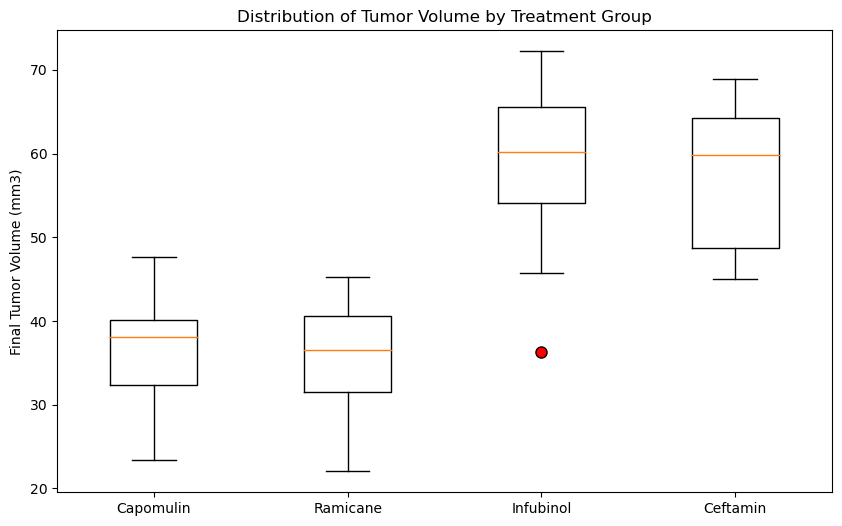

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':8})
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

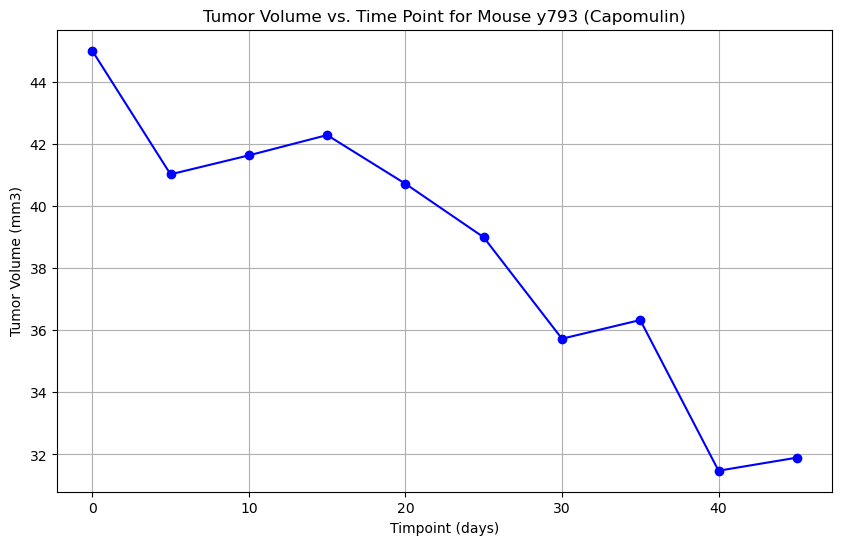

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Select a single mouse treated with Capomulin 
selected_mouse_id = 'y793'

# Step 2: Filter the data for the selected mouse and Capomulin treatment regimen
selected_mouse_data = mouse_data_complete[(mouse_data_complete['Mouse ID'] == selected_mouse_id) & (mouse_data_complete['Drug Regimen'] == 'Capomulin')]

# Step 3: Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))

plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add labels and a title
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')
plt.xlabel('Timpoint (days)')
plt.ylabel('Tumor Volume (mm3)')


# Show the plot
plt.grid(True)
plt.show()

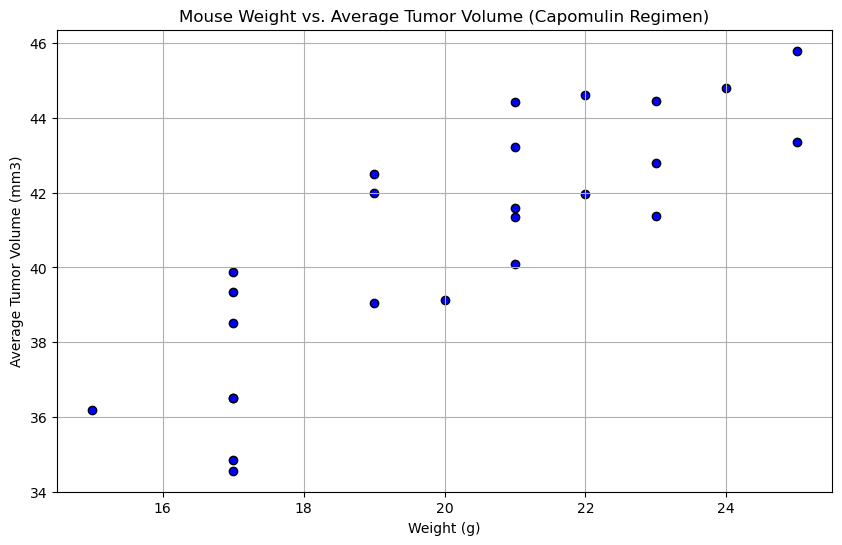

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_data_complete[mouse_data_complete['Drug Regimen'] == 'Capomulin']

# Step 2: Group the data by Mouse ID and calculate the average tumor volume and weight
avg_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black')

# Add labels and a title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

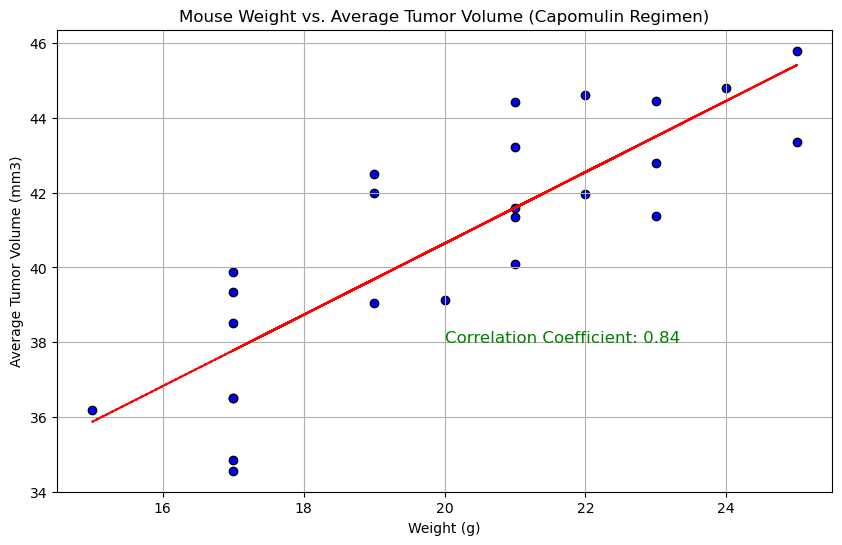

Linear Regression Results:
Slope: 0.95
Intercept: 21.55
R-squared Value: 0.71
P-value: 0.00000
Standard Error: 0.13


In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Step 1: Filter the data for the Capomulin regimen
capomulin_data = mouse_data_complete[mouse_data_complete['Drug Regimen'] == 'Capomulin']

# Step 2: Group the data by Mouse ID and calculate the average tumor volume and weight
avg_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Step 3: Calculate the correlation coefficient
correlation_coefficient = avg_data['Weight (g)'].corr(avg_data['Tumor Volume (mm3)'])

# Step 4: Create a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Step 5: Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black')
plt.plot(avg_data['Weight (g)'], slope * avg_data['Weight (g)'] + intercept, color='red', linestyle='--')

# Add labels and a title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



# Show the correlation coefficient on the plot
plt.text(20, 38, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='green')

# Show the plot
plt.grid(True)
plt.show()

# Print the linear regression results
print(f"Linear Regression Results:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared Value: {r_value**2:.2f}")
print(f"P-value: {p_value:.5f}")
print(f"Standard Error: {std_err:.2f}")